# How to reach 94% Accuracy on CIFAR-10 using fast.ai

- 94% is [SOTA](https://paperswithcode.com/sota/image-classification-on-cifar-10) using a standard ResNet-50 model

In [10]:
# from fastai import *
import fastai as fa
# from fastai.vision import *
import fastai.vision as fav

In [2]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz
!mkdir data
!tar zxf cifar10.tgz -C data/

--2020-08-27 22:18:46--  https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.82.210
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.82.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135107811 (129M) [application/x-tar]
Saving to: ‘cifar10.tgz’

cifar10.tgz         100%[===================>] 128,85M  4,49MB/s    in 22s     

2020-08-27 22:19:10 (5,96 MB/s) - ‘cifar10.tgz’ saved [135107811/135107811]



In [3]:
data_path = 'data/cifar10/'
np.random.seed(1)

# data = ImageDataBunch.from_folder(data_path, train="train", valid="test", ds_tfms=None, size=64, num_workers=0).normalize(imagenet_stats)

data = (ImageList.from_folder(data_path)
            .split_by_folder(train='train', valid='test')
            .label_from_folder()
            .transform(get_transforms(), size=64)
            .databunch(bs=64)
            .normalize(imagenet_stats)
      )


In [11]:
fav.imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

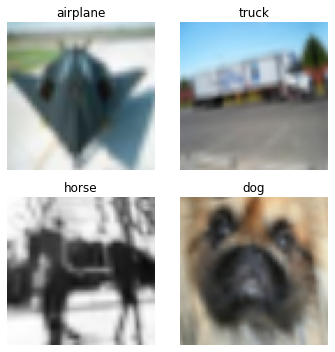

In [4]:
data.show_batch(rows=2, figsize=(5,5))

In [5]:
# | note: this by default loads a pretrained model on imagenet, with all layers but the last dense layers freezed
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], true_wd=False)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


## Stage-1: Training freezed model

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


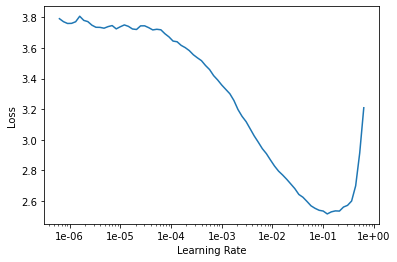

In [6]:
learn.lr_find()
learn.recorder.plot()

In [7]:
lr1 = 1e-3
learn.fit_one_cycle(3, lr1)
learn.save('stage-1')

epoch,train_loss,valid_loss,accuracy,time
0,0.601713,0.438583,0.848200,01:43
1,0.409589,0.336212,0.897500,01:42
2,0.351480,0.279263,0.911300,01:41


In [8]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: data/cifar10;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

## Stage-2: Fine-tuning complete model

In [9]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


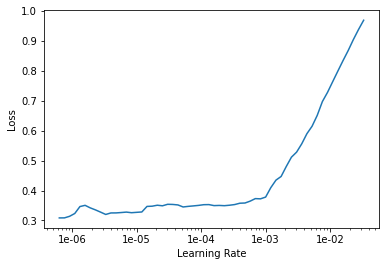

In [10]:
learn.lr_find()
learn.recorder.plot()

In [11]:
lr2 = lr1/5
learn.fit_one_cycle(5, slice(1e-5, lr2))
learn.save('stage-2')

epoch,train_loss,valid_loss,accuracy,time
0,0.351886,0.282868,0.910900,01:53
1,0.326191,0.271721,0.916100,01:52
2,0.233127,0.229088,0.928800,01:49
3,0.200190,0.199209,0.941600,01:49
4,0.141622,0.190462,0.942900,01:48


In [12]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: data/cifar10;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

## Stage-3: More fine-tuning

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


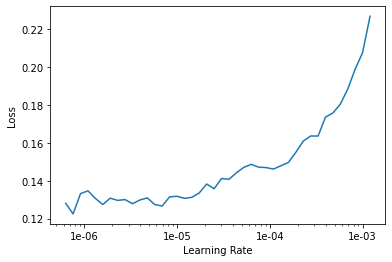

In [13]:
learn.lr_find()
learn.recorder.plot()

In [15]:
lr3 = lr2/5
learn.fit_one_cycle(5, slice(1e-6, lr3))
learn.save('stage-3')

epoch,train_loss,valid_loss,accuracy,time
0,0.129592,0.195108,0.941600,01:49
1,0.127567,0.191763,0.943100,01:51
2,0.121102,0.194230,0.944300,01:50
3,0.107422,0.192422,0.944300,01:50
4,0.097818,0.190087,0.945000,01:50
